In [6]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print(f'User uploaded file "{fn}" with length {len(uploaded[fn])} bytes')

In [7]:
import zipfile
zip_ref = zipfile.ZipFile("/content/Soil_Dataset.zip")
zip_ref.extractall()
zip_ref.close()

In [8]:
import os
for dirpath, filenames, dirnames in os.walk("/content/Soil_Dataset"):
  print(f"There are {len(filenames)} directories and {len(dirnames)} images in {dirpath} ")

There are 2 directories and 0 images in /content/Soil_Dataset 
There are 2 directories and 0 images in /content/Soil_Dataset/Train 
There are 0 directories and 199 images in /content/Soil_Dataset/Train/Clay soil 
There are 0 directories and 264 images in /content/Soil_Dataset/Train/Red soil 
There are 2 directories and 0 images in /content/Soil_Dataset/test 
There are 0 directories and 65 images in /content/Soil_Dataset/test/Clay soil 
There are 0 directories and 106 images in /content/Soil_Dataset/test/Red soil 


In [9]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/Soil_Dataset/Train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*") ))
class_names

array(['Clay soil', 'Red soil'], dtype='<U9')

In [10]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def veiw_radom_image(target_dir,target_class):
  target_folder = target_dir + target_class
  random_img = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + "/" + random_img[0])
  plt.imshow(img)
  plt.axis(False)
  plt.title(target_class)
  print(f"Image path {target_folder + '/' + random_img[0]}")
  print(f"The image shape is {img.shape}")

  return img


Image path /content/Soil_Dataset/Train/Clay soil/Clay_1.jpg
The image shape is (183, 275, 3)


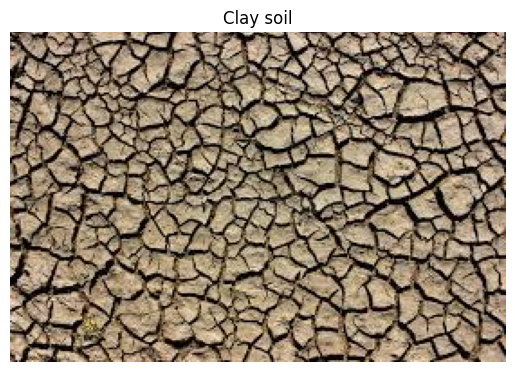

In [11]:
img = veiw_radom_image(target_dir="/content/Soil_Dataset/Train/",
                       target_class="Clay soil")


In [12]:
import tensorflow as tf

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "/content/Soil_Dataset/Train/"
test_dir =  "/content/Soil_Dataset/test/"

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [15]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary")


Found 461 images belonging to 2 classes.
Found 170 images belonging to 2 classes.


In [16]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,input_shape=(224,224,3),activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model_1.fit(train_data,
            epochs=5,
            steps_per_epoch = len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 474ms/step - accuracy: 0.7268 - loss: 0.6408 - val_accuracy: 0.8941 - val_loss: 0.2728
Epoch 2/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - accuracy: 0.8847 - loss: 0.2987 - val_accuracy: 0.9588 - val_loss: 0.1751
Epoch 3/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 0.9303 - loss: 0.2325 - val_accuracy: 0.9588 - val_loss: 0.1323
Epoch 4/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 0.9535 - loss: 0.1467 - val_accuracy: 0.9588 - val_loss: 0.0948
Epoch 5/5
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 184ms/step - accuracy: 0.9866 - loss: 0.1049 - val_accuracy: 0.9824 - val_loss: 0.0938


In [18]:
model_1.evaluate(test_data)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 202ms/step - accuracy: 0.9804 - loss: 0.1114


[0.09383895248174667, 0.9823529124259949]

In [19]:
def load_and_process(filename,img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size=[img_shape,img_shape])
  img = img/255.
  return img


In [20]:
soil = load_and_process("/content/clay_soil_predict.jpg")

NotFoundError: {{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} /content/clay_soil_predict.jpg; No such file or directory [Op:ReadFile]

In [ ]:
soil = tf.expand_dims(soil,axis=0)

In [ ]:
soil.shape

In [ ]:
model_1.predict(soil)

In [ ]:
def pred_and_plot(model,filename,class_names):
  img = load_and_process(filename)
  img = tf.expand_dims(img, axis=0) # Add batch dimension
  pred = model.predict(img)
  pred_class = class_names[int(tf.round(pred)[0][0])]
  plt.imshow(tf.squeeze(img)) # Remove batch dimension for plotting
  plt.axis(False)
  plt.title(pred_class)

In [ ]:
pred_and_plot(model_1,
              filename="/content/clay_soil_predict.jpg",
              class_names=class_names)

In [ ]:
pred_and_plot(model_1,"/content/61A+ysVsqgL._UF1000,1000_QL80_.jpg",class_names)

In [ ]:
pred_and_plot(model_1,"/content/pexels-photo-1710813.jpeg",class_names)